# Answer to COMPFEST 2020 Essay Competition
Halo, perkenalkan saya Muhammad Raihan sebagai salah satu peserta kompetisi COMPFEST 2020
Notebook ini adalah jawaban saya untuk pertanyaan dalam tes esai kompetisi COMPFEST 2020. Terimakasih!

***10 Pertanyaan Utama***
1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?
2. Kota apa yang memiliki mobil bekas paling banyak?
3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?
4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.
6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.
7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.
8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?
9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?
10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

### Import perangkat utilitas

In [1]:
# Import perangkat utilitas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats

sns.set(style="darkgrid")

### Penyusunan Dataframe

In [2]:
# Buat Dataframe dari CSV File
dataset = "used_car_data.csv"
df = pd.read_csv(dataset)

### Ukuran Dataframe

In [3]:
# Lihat ukuran dari Dataframe
print("Dataframe Shape =", df.shape)

Dataframe Shape = (6019, 12)


### 5 Entri Teratas

In [5]:
# Lihat lima entri teratas dalam data frame
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### 5 Entri Terbawah

In [6]:
# Lihat lima entri terbawah dalam data frame
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


### Properti Dataframe

In [7]:
# Inspeksi beberapa properti dari Dataframe

# Lihat tipe dari masing-masing kolom
df_dtypes = df.dtypes.rename("Dtypes")

# Lihat jumlah unik untuk setiap tipe kolom "object"
df_nunique = df.nunique().rename("Unique Counts")

# Lihat ada berapa "NaN" dari setiap kolom
df_nan_count = df.isnull().sum().rename("NaN Counts")

df_property = pd.concat([df_dtypes, df_nunique, df_nan_count], axis="columns")
df_property

,Dtypes,Unique Counts,NaN Counts
Name,object,1876,0
Location,object,11,0
Year,int64,22,0
Kilometers_Driven,int64,3093,0
Fuel_Type,object,5,0
Transmission,object,2,0
Owner_Type,object,4,0
Mileage,object,442,2
Engine,object,146,36
Power,object,372,36


Berdasarkan kelima entri teratas *dataframe* dan beberapa properti di atas, diketahui bahwa kolom "Mileage, Engine, dan Power" yang merupakan entri angka memiliki *dtype* berupa "**object**". Tentu hal ini karena dalam entrinya mereka juga ditulis dengan satuannya. Oleh karena itu perlu adanya penyesuaian *dtype* untuk ketiga kolom tersebut. Selain itu, ketiga kolom tersebut bersama kolom "Seats" juga memiliki data kosong sehingga perlu adanya penyesuaian lagi bagi kolom-kolom tersebut.

# SOAL PERTAMA
*Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?*

In [ ]:
# Lihat kelima entri teratas kolom "Name"
df["Name"].head()

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: Name, dtype: object

Diketahui bahwa dalam kolom tersebut, merek utama mobil juga diikuti dengan tipe mobil tersebut. Oleh karena itu, perlu diambil *string* pertama dari masing-masing entry dalam kolom tersebut baru kemudian dihitung frekuensinya.

In [ ]:
# Menangkap merek utama dari setiap entri
brand = df["Name"].map(lambda brand: brand.split()[0]).rename("Brand")

# Memasukkan ke dalam Dataframe untuk kemudahan visualisasi
df_brand = df.join(brand)

# Menghitung frekuensi
brand_counts = brand.value_counts().reset_index()\
                .rename(columns={"index": "Brand", "Name": "Counts"})
brand_counts

,Brand,Brand
0,Maruti,1211
1,Hyundai,1107
2,Honda,608
3,Toyota,411
4,Mercedes-Benz,318
5,Volkswagen,315
6,Ford,300
7,Mahindra,272
8,BMW,267
9,Audi,236


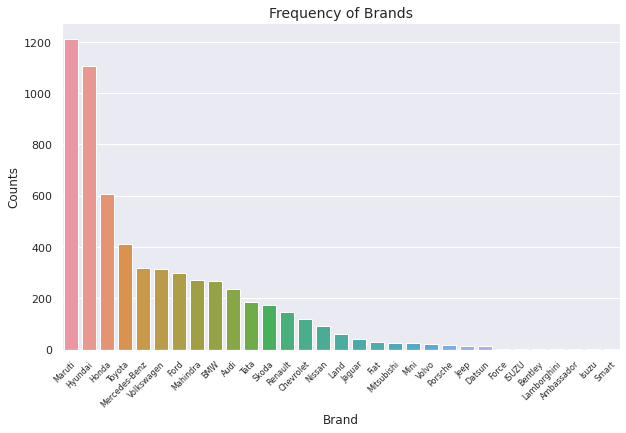

In [ ]:
# Visualisasi jawaban
fig, ax = plt.subplots(figsize=[10, 6])

sns.countplot(x="Brand", data=df_brand,
              order=df_brand["Brand"].value_counts().index);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   ha="right", rotation_mode="anchor", fontsize=8);

ax.set_title("Frequency of Brands", fontsize=14)
ax.set_ylabel("Counts");

***JAWABAN***: Terdapat di *output* atau dalam variabel `brand_counts`

# SOAL KEDUA
*Kota apa yang memiliki mobil bekas paling banyak?*

In [ ]:
# Menghitung frekuensi entri pada kolom "Location"
locations = df["Location"].value_counts().reset_index()\
            .rename(columns={"index": "Location", "Location": "Counts"})
locations

,Location,Counts
0,Mumbai,790
1,Hyderabad,742
2,Kochi,651
3,Coimbatore,636
4,Pune,622
5,Delhi,554
6,Kolkata,535
7,Chennai,494
8,Jaipur,413
9,Bangalore,358


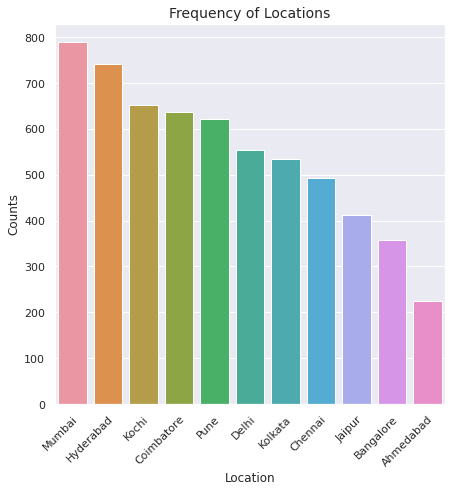

In [ ]:
# Visualisasi jawaban

fig, ax = plt.subplots(figsize=[7, 7])

sns.countplot(x="Location", data=df,
              order=df["Location"].value_counts().index);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   ha="right", rotation_mode="anchor");

ax.set_title("Frequency of Locations", fontsize=14);
ax.set_ylabel("Counts");

***JAWABAN***: Kota Mumbai, disusul Kota Hyderabad dan Kochi.

# SOAL KETIGA
*Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?*

In [ ]:
# Menghitung frekuensi entri pada kolom "Year"
year_dist = df["Year"].value_counts().sort_index().reset_index()\
                      .rename(columns={"index": "Year", "Year": "Count"})
year_dist

,Year,Count
0,1998,4
1,1999,2
2,2000,4
3,2001,8
4,2002,15
5,2003,17
6,2004,31
7,2005,57
8,2006,78
9,2007,125


In [ ]:
df["Year"].describe().reset_index()\
          .rename(columns={"index": "Stats", "Year": "Value"})

,Stats,Value
0,count,6019.000000
1,mean,2013.358199
2,std,3.269742
3,min,1998.000000
4,25%,2011.000000
5,50%,2014.000000
6,75%,2016.000000
7,max,2019.000000


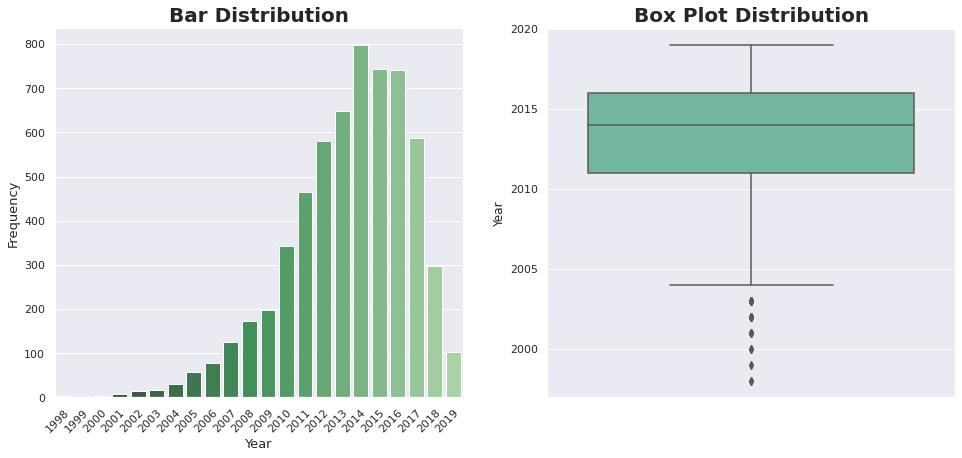

In [ ]:
# Menyiapkan grafik untuk memvisualisasikan distribusi
fig, ax = plt.subplots(1, 2, figsize=[14, 7])

# Visualisasi dalam grafik batang
sns.countplot(x="Year", data=df, ax=ax[0], palette="Greens_d");
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45,
                      ha="right", rotation_mode="anchor");
ax[0].set_title("Bar Distribution", fontsize=20, fontweight="bold");
ax[0].set_xlabel("Year", fontsize=13);
ax[0].set_ylabel("Frequency", fontsize=13);

# Visualisai dalam bentuk box plot
sns.boxplot(y="Year", data=df, palette="Set2");
ax[1].set_title("Box Plot Distribution", fontsize=20, fontweight="bold");

fig.tight_layout(pad=2.5)

***JAWABAN***: Distribusi memiliki bentuk *negatively skewed* dengan rincian jawaban terdapat pada *output* di atas

# SOAL KEEMPAT
*Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?*

In [ ]:
# Menghitung berapa banyak mobil dengan jarak pemakaian < 100 ribu km
below_one_hundred_thousands = df[df["Kilometers_Driven"] < 100_000]
print("There are", below_one_hundred_thousands.shape[0],
      "cars with kilometers driven below 100,000 km.")

There are 5470 cars with kilometers driven below 100,000 km.


***JAWABAN***: 5470 mobil memiliki total jarak pemakaian di bawah 100.000 km.

# SOAL KELIMA
*Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.*

Kategori **rendah** atau **tinggi** suatu entri dapat ditentukan dengan mencari Q1 dan Q3 dari data. Apabila:
* Entri < Q1 = rendah
* Entri > Q3 = tinggi
* Q1 <= Entri <= Q3 = biasa

In [ ]:
# Mengambil data total jarak pemakaian dan mengurutkannya
km_driven = df["Kilometers_Driven"].sort_values(ascending=False)

# Ringkasan statistik
stats_km_driven = round(km_driven.describe(), 3)

# Mengambil Q1 dan Q3
Q1 = stats_km_driven["25%"]
Q3 = stats_km_driven["75%"]

print("Low entry is when the entry is below {} km"\
     .format(Q1))
print("High entry is when the entry is above {} km"\
     .format(Q3))

Low entry is when the entry is below 34000.0 km
High entry is when the entry is above 73000.0 km


***JAWABAN***: Batasnya adalah:
* Rendah ==> x < 34.000 km
* Tinggi ==> x > 73.000 km

# SOAL KEENAM
*Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.*

Perhitungan *outlier* bisa diukur dengan menggunakan *Interquartile Range*, dengan rumus sebagai berikut:
* Interquartile Range = Q3 - Q1
* Outlier tinggi = Q3 + 1,5(IQR)
* Outlier rendah = Q1 - 1,5(IQR)

In [ ]:
# Menetapkan Interquartile Range
IQR = Q3 - Q1

# Menetapkan batas outlier
high_outlier_border = Q3 + 1.5*IQR
low_outlier_border = Q1 - 1.5*IQR

# Menghitung jumlah outlier tinggi dan outlier rendah
high_outlier_counts = km_driven[km_driven > high_outlier_border].count()
low_outlier_counts = km_driven[km_driven < low_outlier_border].count()

# Menulis jumlah outlier
print("High Outlier Counts = {}".format(high_outlier_counts))
print("Low Outlier Counts = {}".format(low_outlier_counts))
print("Total Outliers = {}".format(high_outlier_counts + low_outlier_counts))

High Outlier Counts = 202
Low Outlier Counts = 0
Total Outliers = 202


***JAWABAN***: Ada (High Outlier ada 202, tidak ada low outlier)

# SOAL KETUJUH
*Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.*

In [ ]:
# Membentuk Dataframe yang berisi kolom "Year dan Kilometers_Driven" saja
year_km_driven = df[["Year", "Kilometers_Driven"]].sort_values("Year")


# Melihat korelasi antara kedua variabel tersebut
print("Correlation between year and kilometers driven is =",
      year_km_driven.corr().loc["Year", "Kilometers_Driven"])
year_km_driven.corr()

Correlation between year and kilometers driven is = -0.17304756550241315


,Year,Kilometers_Driven
Year,1.000000,-0.173048
Kilometers_Driven,-0.173048,1.000000


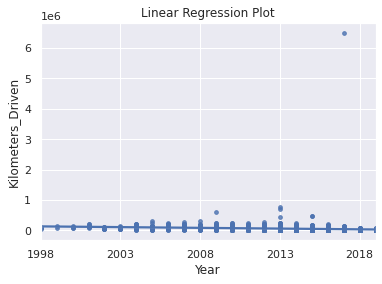

In [ ]:
# Melihat korelasi dalam grafik
sns.regplot(x="Year", y="Kilometers_Driven",
            data=year_km_driven, scatter_kws={"s":14});
plt.xticks(np.arange(df["Year"].min(), df["Year"].max(), 5))
plt.title("Linear Regression Plot");

Diketahui bahwa terdapat satu outlier pada kolom "Kilometers_Driven" yang sangat besar, mari inspeksi entri tersebut.

In [ ]:
df_kmdriven_huge_outlier = df[df["Kilometers_Driven"] > 1_000_000]

# 1 juta adalah estimasi dari grafik bahwa tidak ada entri lain
# selain outlier tersebut yang lebih besar dari 1 juta

df_kmdriven_huge_outlier                                 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0


Betul saja, bahwa terdapat satu entri yang memiliki nilai outlier lebih dari 5 juta! Coba seandainya kita tidak memasukkan entri tersebut dalam perhitungan korelasi.

In [ ]:
# Keluarkan outlier tersebut dari Dataframe
no_big_outlier_year_kmdriven = year_km_driven.drop(index=2328)


# Melihat korelasi antara kedua variabel dalam Dataframe baru tersebut
print("The new correlation between year and kilometers driven is =",
      no_big_outlier_year_kmdriven.corr().loc["Year", "Kilometers_Driven"])
no_big_outlier_year_kmdriven.corr()

The new correlation between year and kilometers driven is = -0.44851853107916306


,Year,Kilometers_Driven
Year,1.000000,-0.448519
Kilometers_Driven,-0.448519,1.000000


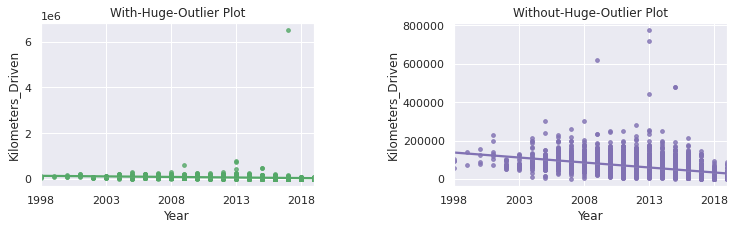

In [ ]:
# Memvisualisasikan kedua korelasi tersebut
fig, ax = plt.subplots(1, 2, figsize=[12, 5], clear=True)


# Grafik dengan outlier besar tersebut
sns.regplot(x="Year", y="Kilometers_Driven", data=year_km_driven,
            ax=ax[0], color="g", scatter_kws={"s":14});
ax[0].set_title("With-Huge-Outlier Plot");
ax[0].set_xticks(np.arange(df["Year"].min(), df["Year"].max(), 5))


# Grafik tanpa outlier besar tersebut
sns.regplot(x="Year", y="Kilometers_Driven",
            data=no_big_outlier_year_kmdriven,
            color="m", scatter_kws={"s":14});
ax[1].set_title("Without-Huge-Outlier Plot");
ax[1].set_xticks(np.arange(df["Year"].min(), df["Year"].max(), 5))


# Memberi jarak kedua grafik
fig.tight_layout(pad=6)

***JAWABAN***: Tidak ada. Meskipun telah dicoba baik dengan outlier besar tersebut maupun tanpanya, tetap saja korelasi yang tercipta belum cukup kuat untuk dapat dinyatakan bahwa terdapat hubungan antara tahun pembuatan mobil dengan total jarak pemakaian.

# SOAL KEDELAPAN
*Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?*

In [ ]:
# Melihat apa saja jenis entri dalam kolom "Owner_Type"
print(df["Owner_Type"].unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
# Mengambil entri yang merupakan "Third" dan "Fourth & Above"
third = df[df["Owner_Type"] == "Third"]
fourth_above = df[df["Owner_Type"] == "Fourth & Above"]

# Menggabungkan kedua jenis entri tersebut
third_above = pd.concat([third, fourth_above])

print("There are", third_above.shape[0],
      "cars with the owner type third and above")

There are 122 cars with the owner type third and above


***JAWABAN***: Terdapat 122 mobil yang merupakan kepemilikan ketiga atau lebih

# SOAL KESEMBILAN
*Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?*

Karena sebelumnya telah diketahui bahwa beberapa entri memiliki satuan yang berbeda dan *dtype* dari kolom "Mileage" adalah "object", maka perlu penyamaan satuan dan diubah menjadi "float64".

In [ ]:
# Series untuk menangkap kolom "Mileage" dengan angka dan satuan terpisah
mileage = df["Mileage"].map(lambda x: str(x).split())


# Menyiapkan Dataframe untuk menyusun dimasukkan
# angka dan satuan dalam mileage
df_mileage = pd.DataFrame(columns=["Mileage Number", "Mileage Unit"])


# Mengiterasi entri dalam "Mileage" untuk dimasukkan ke dalam Dataframe
for row, value in enumerate(mileage):
    
    
    # Ketika entri normal (berisi angka dan satuan), maka len-nya adalah 2
    if len(value) == 2:
        df_mileage.loc[row] = [value[0], value[1]]
    
    
    # Namun ketika entri kosong (NaN), maka len-nya bukan 2
    # maka entri yang dimasukkan adalah angka=0, satuan=NaN
    else:
        df_mileage.loc[row] = [0, *value]

Selanjutnya cek apakah seluruh entri merupakan angka agar dapat dijadikan ke dalam bentuk "float64".

In [ ]:
# Cek apakah seluruh entri angka benar-benar berupa angka
not_number = []
for entry in list(df_mileage["Mileage Number"]):
    try:
        float(entry)
    except ValueError:
        not_number.append(entry)

if not not_number:
    print("Every entries are number")
else:
    print(set(not_number))

Every entries are number


In [ ]:
# Mengubah dtype angka menjadi "float64"
df_mileage["Mileage Number"] = df_mileage["Mileage Number"].astype("float64")

Melihat nilai unik pada kolom "Fuel_Type".

In [ ]:
# Melihat apa saja nilai unik dan jumlahnya pada kolom "Fuel_Type"
print(df["Fuel_Type"].value_counts())

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


Melihat jenis satuan pada kolom "Mileage".

In [ ]:
# Inspeksi jenis satuan yang terdapat dalam "Mileage"
print(df_mileage["Mileage Unit"].value_counts())

kmpl     5951
km/kg      66
nan         2
Name: Mileage Unit, dtype: int64


Karena mayoritas satuan berada dalam "kmpl", maka mari inspeksi satuan "km/kg" dan yang tidak memiliki satuan serta coba untuk mengubahnya menjadi kmpl apabila perlu.

Entri km/kg

In [ ]:
# Melihat entri yang memiliki satuan km/kg
df_with_kmkg = df[df_mileage["Mileage Unit"] == "km/kg"]


# Melihat "Fuel_Type" apa yang mereka miliki
print(df_with_kmkg["Fuel_Type"].value_counts())

CNG    56
LPG    10
Name: Fuel_Type, dtype: int64


Tidak ada entri / NaN

In [ ]:
# Melihat entri yang tidak memiliki nilai (NaN)
df_nan_mileage = df[df_mileage["Mileage Unit"] == "nan"]
df_nan_mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


Diketahui bahwa kedua tipe bahan bakar (Fuel_Type) yang tidak memiliki nilai konsumsi bahan bakar (Mileage) adalah Electric dan Electric hanya terdapat dua entry saja dalam seluruh CSV File, maka aman untuk dikatakan bahwa Electric tidak bisa dijadikan patokan dalam mengukur kehematannya, atau dalam kata lain, dihilangkan saja.

Serta karena tipe bensin yang memiliki konsumsi bahan bakar dalam unit km/kg adalah CNG dan LPG, maka aman pula untuk dikatakan bahwa seluruh satuan dalam kolom "Mileage" tidak memiliki pengaruh dalam membandingkan nilai angka setiap konsumsi bahan bakar.

In [ ]:
# Membuat Dataframe berisi tipe bahan bakar dan angka konsumsi bahan bakar
df_fueltype_mileage = df[["Fuel_Type"]].join(df_mileage["Mileage Number"])


# Buat ringkasan statistik Dataframe tersebut
df_fuel_mileage_desc = df_fueltype_mileage.groupby("Fuel_Type").describe().T
df_fuel_mileage_desc

Fuel_Type                   CNG       Diesel  Electric        LPG       Petrol
Mileage Number count  56.000000  3205.000000       2.0  10.000000  2746.000000
               mean   25.418036    18.620484       0.0  19.385000    17.415204
               std     5.953456     4.962370       0.0   5.340363     3.819760
               min    13.200000     0.000000       0.0  13.450000     0.000000
               25%    22.100000    14.840000       0.0  14.412500    15.640000
               50%    26.600000    19.010000       0.0  18.250000    17.800000
               75%    27.737500    22.690000       0.0  24.925000    19.400000
               max    33.540000    28.400000       0.0  26.200000    26.000000

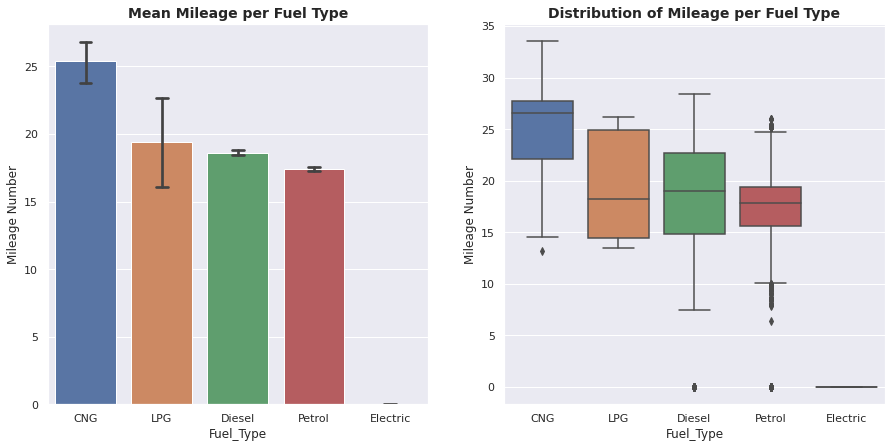

In [ ]:
# Urutan sumbu x
graph_order = df_fueltype_mileage.groupby("Fuel_Type")["Mileage Number"]\
                                 .mean().sort_values(ascending=False).index

# Menyiapkan susunan grafik
fig, ax = plt.subplots(1, 2, figsize=[15, 7])


# Grafik batang untuk rata-rata (garis menandakan error)
sns.barplot(x="Fuel_Type", y="Mileage Number",
            data=df_fueltype_mileage, ax=ax[0], capsize=.15,
            order=graph_order);
ax[0].set_title("Mean Mileage per Fuel Type",
                fontsize=14, fontweight="bold");


# Grafik boxplot
sns.boxplot(x="Fuel_Type", y="Mileage Number", data=df_fueltype_mileage,
            order=graph_order);
ax[1].set_title("Distribution of Mileage per Fuel Type",
               fontsize=14, fontweight="bold");

***JAWABAN***: Berdasarkan *output* di atas, tipe bahan bakar yang paling hemat adalah **CNG**

# SOAL KESEPULUH
*Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.*

Dalam mencari korelasi, entri-entri yang tidak memiliki nilai (NaN) agar tidak memengaruhi hasil perlu didrop dari Dataframe.

In [ ]:
# Mencari index yang memiliki nilai NaN untuk kemudian di-drop
nan_index = df[pd.isnull(df).any(1)].index
nan_index

Int64Index([ 194,  208,  229,  733,  749, 1294, 1327, 1385, 1460, 1917, 2074,
            2096, 2264, 2325, 2335, 2369, 2530, 2542, 2623, 2668, 2737, 2780,
            2842, 3272, 3404, 3520, 3522, 3800, 3810, 3882, 4011, 4152, 4229,
            4446, 4577, 4604, 4697, 4712, 4904, 4952, 5015, 5185, 5270, 5893],
           dtype='int64')

In [ ]:
# Dataframe utama yang sudah di-drop seluruh nilai NaN
df_nonan = df.dropna()
print("There are {} rows removed due to having NaN values"\
     .format(df.shape[0] - df_nonan.shape[0]))

There are 44 rows removed due to having NaN values


Untuk mengetahui seluruh variabel angka dalam *dtype* "object", perlu disamakan satuannya dan dikonversi *dtype*-nya menjadi "float64". Kolom-kolom tersebut adalah "Mileage", "Engine", dan "Power".

### Mileage
Pada nomor sembilan kolom ini sudah diambil nilai integer-nya, maka untuk menyamakan jumlah kolom mari drop index yang tergolong index NaN.

In [ ]:
df_mileage2 = df_mileage.drop(nan_index)

### Engine

In [ ]:
# Series untuk menangkap kolom "Engine" dengan angka dan satuan terpisah
engine = df["Engine"].map(lambda x: str(x).split())


# Menyiapkan Dataframe untuk menyusun dimasukkan
# angka dan satuan dalam engine
df_engine = pd.DataFrame(columns=["Engine Number", "Engine Unit"])


# Mengiterasi entri dalam "Engine" untuk dimasukkan ke dalam Dataframe
for row, value in enumerate(engine):
    if len(value) == 2:
        df_engine.loc[row] = [value[0], value[1]]
    else:
        df_engine.loc[row] = [np.nan, np.nan]

In [ ]:
# Drop entri NaN
df_engine = df_engine.drop(nan_index)

In [ ]:
# Cek apakah seluruh entri engine angka benar-benar berupa angka
not_number = []
for entry in list(df_engine["Engine Number"]):
    try:
        float(entry)
    except:
        not_number.append(entry)

if not not_number:
    print("Every entries are number")
else:
    print(not_number)

Every entries are number


In [ ]:
# Mengubah dtype angka menjadi "float64"
df_engine["Engine Number"] = df_engine["Engine Number"].astype("float64")

In [ ]:
# Mengecek ada berapa satuan dalam entri
df_engine["Engine Unit"].unique()

array(['CC'], dtype=object)

### Power

In [ ]:
# Series untuk menangkap kolom "Power" dengan angka dan satuan terpisah
power = df["Power"].map(lambda x: str(x).split())


# Menyiapkan Dataframe untuk menyusun dimasukkan
# angka dan satuan dalam power
df_power = pd.DataFrame(columns=["Power Number", "Power Unit"])


# Mengiterasi entri dalam "Power" untuk dimasukkan ke dalam Dataframe
for row, value in enumerate(power):
    if len(value) == 2:
        df_power.loc[row] = [value[0], value[1]]
    else:
        df_power.loc[row] = [np.nan, np.nan]

In [ ]:
# Drop entri NaN
df_power = df_power.drop(nan_index)

In [ ]:
# Cek apakah seluruh entri engine angka benar-benar berupa angka
not_number = []
for entry in list(df_power["Power Number"]):
    try:
        float(entry)
    except ValueError:
        not_number.append(entry)

if not not_number:
    print("Every entries are number")
else:
    print(set(not_number))

{'null'}


Ternyata selain entri kosong / NaN, terdapat entri kosong pula yang bukan teregister sebagai NaN dalam pandas, yaitu "null bhp". Karenanya, seluruh entri dalam Dataframe yang memiliki nilai power berupa "null bhp" perlu di-*drop* agar tidak memengaruhi perhitungan.

In [ ]:
# Diketahui beberapa entri ada yang berupa str("null bhp")
# Cari index tersebut dan drop baris tersebut dari
# perhitungan korelasi
null_index = list(df_power[df_power["Power Number"] == "null"].index)

Selain terdapat entri null, perlu diingat dalam variabel "Kilometers_Driven", terdapat outlier yang sangat besar, mari drop index itu juga.

In [ ]:
# Men-drop index pada ketiga series yang entri powernya adalah null
# serta menyiapkan copy df yang juga tanpa NaN dan null
df_mileage2 = df_mileage2.drop(null_index).drop(2328)
df_engine = df_engine.drop(null_index).drop(2328)
df_power = df_power.drop(null_index).drop(2328)
df_nonan = df_nonan.drop(null_index).drop(2328)

In [ ]:
# Mengubah dtype angka menjadi "float64"
df_power["Power Number"] = df_power["Power Number"].astype("float64")

In [ ]:
# Mengecek ada berapa satuan dalam entri
df_power["Power Unit"].unique()

array(['bhp'], dtype=object)

Karena seluruh satuan pada kolom "Engine" dan "Power" adalah sama, maka mari langsung membuat tabel korelasi.

In [ ]:
# Menyusun Dataframe untuk korelasi variabel angka
df_corr = df_nonan.join([df_mileage2, df_engine, df_power])

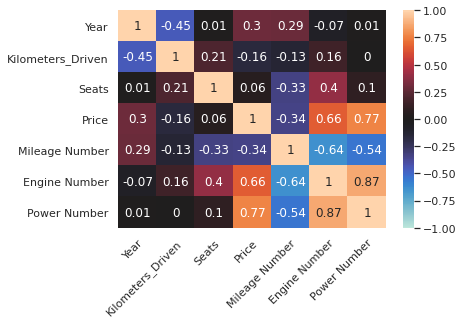

In [ ]:
# Melihat korelasi antar seluruh variabel
hm = sns.heatmap(round(df_corr.corr(), 2), annot=True, center=0, vmin=-1);
hm.set_xticklabels(hm.get_xticklabels(), rotation=45,
                   ha="right", rotation_mode="anchor");

In [ ]:
# Melihat korelasi khusus dengan price
df_corr.corr()["Price"].drop("Price").reset_index()\
.rename(columns={"index": "Variable", "Price": "Correlation with Price"})

,Variable,Correlation with Price
0,Year,0.299192
1,Kilometers_Driven,-0.163565
2,Seats,0.055959
3,Mileage Number,-0.341924
4,Engine Number,0.657790
5,Power Number,0.772661


Visualisasi korelasi dengan variabel angka.

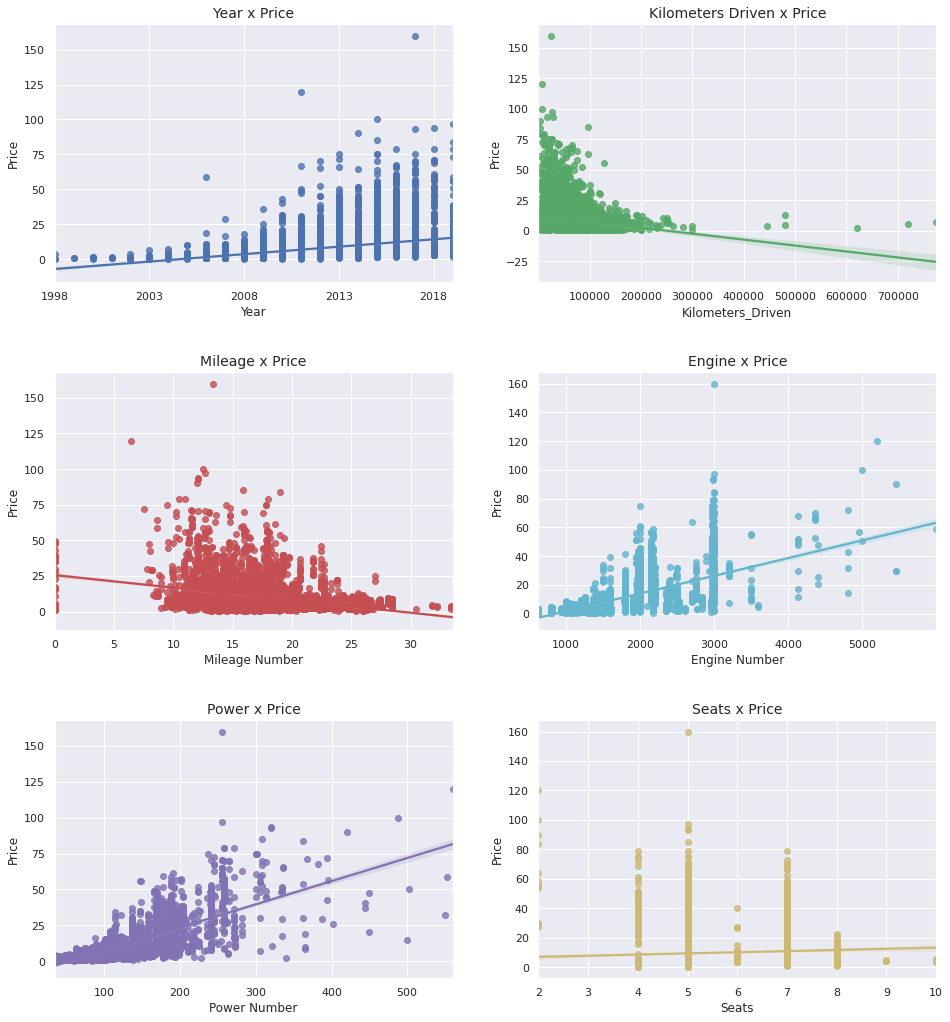

In [ ]:
# Memvisualisasi korelasi variabel price dengan variabel angka lainnya
fig, ax = plt.subplots(3, 2, figsize=[14, 15])

# Korelasi dengan tahun
sns.regplot(df_corr["Year"], df_corr["Price"], ax=ax[0, 0]);
ax[0, 0].set_title("Year x Price", fontsize=14)
ax[0, 0].set_xticks(np.arange(min(df_corr["Year"]),
                              max(df_corr["Year"]), 5));

# Korelasi dengan total jarak pemakaian
sns.regplot(df_corr["Kilometers_Driven"], df_corr["Price"],
            ax=ax[0, 1], color="g");
ax[0, 1].set_title("Kilometers Driven x Price", fontsize=14)

# Korelasi dengan konsumsi bahan bakar
sns.regplot(df_corr["Mileage Number"], df_corr["Price"],
            ax=ax[1, 0], color="r");
ax[1, 0].set_title("Mileage x Price", fontsize=14)

# Korelasi dengan mesin
sns.regplot(df_corr["Engine Number"], df_corr["Price"],
            ax=ax[1, 1], color="c");
ax[1, 1].set_title("Engine x Price", fontsize=14)

# Korelasi dengan kekuatan/power
sns.regplot(df_corr["Power Number"], df_corr["Price"],
            ax=ax[2, 0], color="m");
ax[2, 0].set_title("Power x Price", fontsize=14)

# Korelasi dengan banyak jok
sns.regplot(df_corr["Seats"], df_corr["Price"],
            ax=ax[2, 1], color="y");
ax[2, 1].set_title("Seats x Price", fontsize=14)

fig.tight_layout(pad=3)

Visualisasi rata-rata setiap variabel kategori terhadap harga.

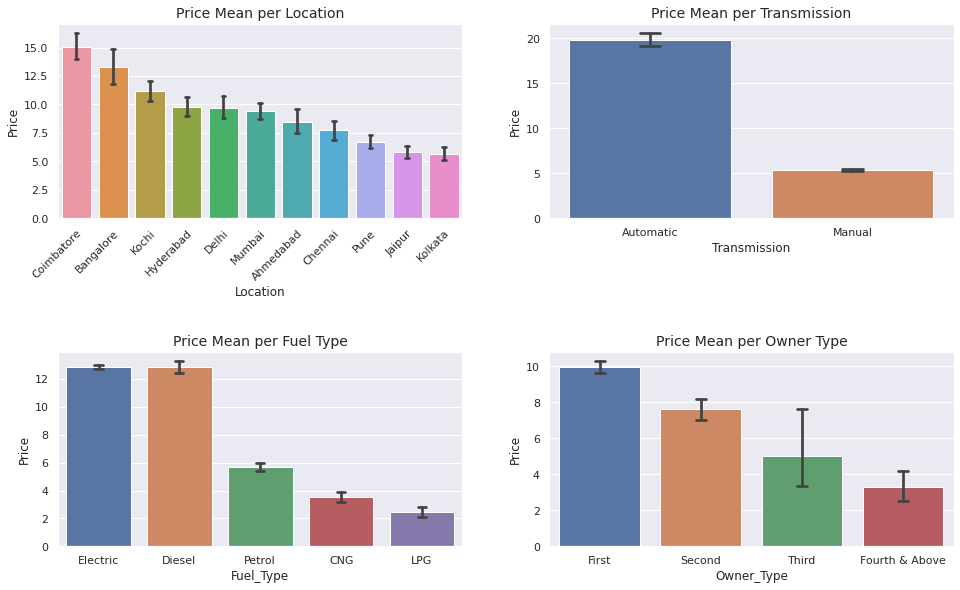

In [ ]:
# Menyiapkan urutan susunan variabel dalam grafik
location_order = df.groupby("Location")["Price"].mean()\
                 .sort_values(ascending=False).index
transmission_order = df.groupby("Transmission")["Price"].mean()\
                     .sort_values(ascending=False).index
fueltype_order = df.groupby("Fuel_Type")["Price"].mean()\
                 .sort_values(ascending=False).index
ownertype_order = df.groupby("Owner_Type")["Price"].mean()\
                  .sort_values(ascending=False).index


# Memvisualisasi  rata-rata price pada setiap variabel kategori
fig, ax = plt.subplots(2, 2, figsize=[14, 9])

# Dengan lokasi
sns.barplot(x="Location", y="Price", data=df,
            order=location_order, ax=ax[0, 0], capsize=.1);
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(),
                         rotation=45, ha="right", rotation_mode="anchor");
ax[0, 0].set_title("Price Mean per Location", fontsize=14);

# Dengan jenis transmisi
sns.barplot(x="Transmission", y="Price", data=df,
            order=transmission_order, ax=ax[0, 1], capsize=.1);
ax[0, 1].set_title("Price Mean per Transmission", fontsize=14);

# Dengan jenis bahan bakar
sns.barplot(x="Fuel_Type", y="Price", data=df,
            order=fueltype_order, ax=ax[1, 0], capsize=.1);
ax[1, 0].set_title("Price Mean per Fuel Type", fontsize=14);

# Dengan jenis kepemilikan
sns.barplot(x="Owner_Type", y="Price", data=df,
            order=ownertype_order, ax=ax[1, 1], capsize=.1);
ax[1, 1].set_title("Price Mean per Owner Type", fontsize=14);

fig.tight_layout(pad=3)